In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv("/Users/aditisinha/Downloads/crop_production.csv")

In [3]:
dataset=dataset.drop(['index'],axis=1)

In [4]:
dataset.shape

(246091, 7)

In [5]:
dataset['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
dataset.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
first_data=dataset.dropna()

In [9]:
first_data.isnull().sum().sum()

0

In [10]:
first_data['yield']=first_data['Production']/first_data['Area']
first_data['yield']

/var/folders/ff/4sk8kzk938178x3h7j_6rb0r0000gn/T/ipykernel_4832/2084904619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_data['yield']=first_data['Production']/first_data['Area']


0          1.594896
1          0.500000
2          3.147059
3          3.642045
4          0.229167
            ...    
246086     2.617647
246087     0.738437
246088    50.154321
246089     2.141848
246090     0.502857
Name: yield, Length: 242361, dtype: float64

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop_Year', ylabel='yield'>

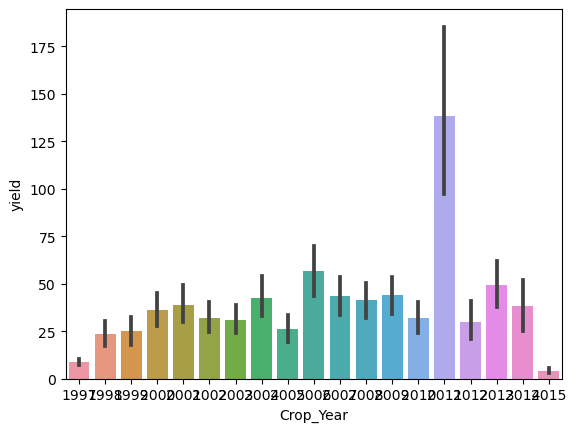

In [11]:
sns.barplot(first_data['Crop_Year'],first_data['yield'])

In [12]:
first_data['Crop_Year'][first_data[['yield']].idxmax()]

163866    2011
Name: Crop_Year, dtype: int64

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

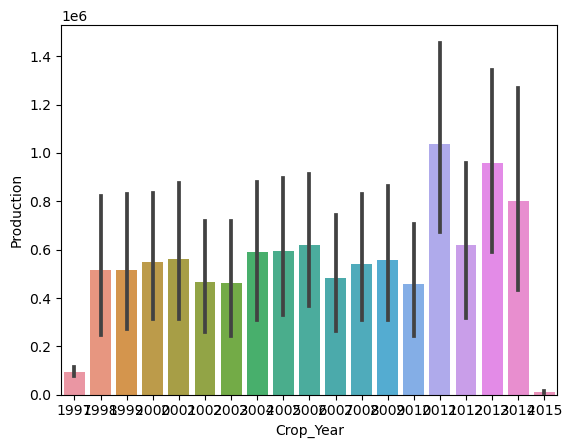

In [13]:
sns.barplot(first_data['Crop_Year'],first_data['Production'])

In [14]:
first_data['Crop_Year'][first_data[['Production']].idxmax()]

178273    2011
Name: Crop_Year, dtype: int64

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

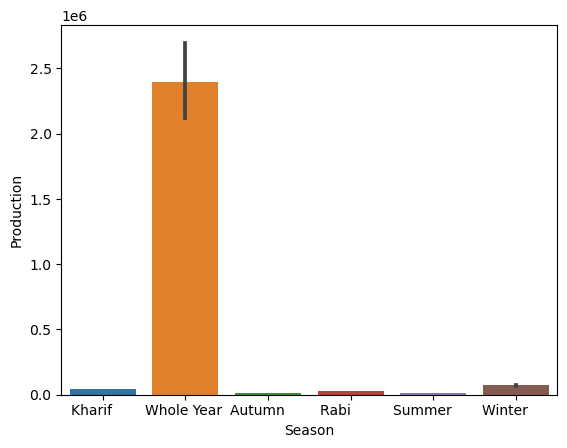

In [15]:
sns.barplot(first_data['Season'],first_data['Production'])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Crop'>

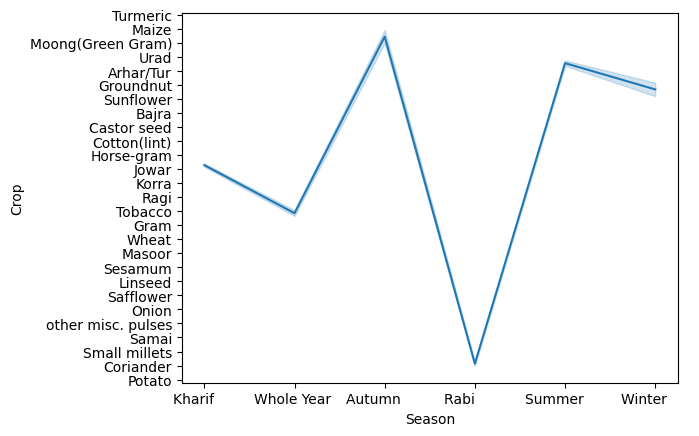

In [16]:
sns.lineplot(first_data['Season'],first_data['Crop'])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Name', ylabel='Production'>

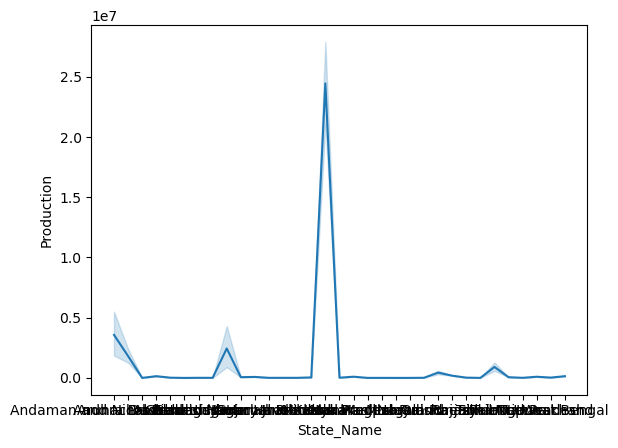

In [17]:
sns.lineplot(first_data['State_Name'],first_data['Production'])

In [18]:
first_data['State_Name'][first_data[['Production']].idxmax()]

178273    Tamil Nadu
Name: State_Name, dtype: object

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop', ylabel='yield'>

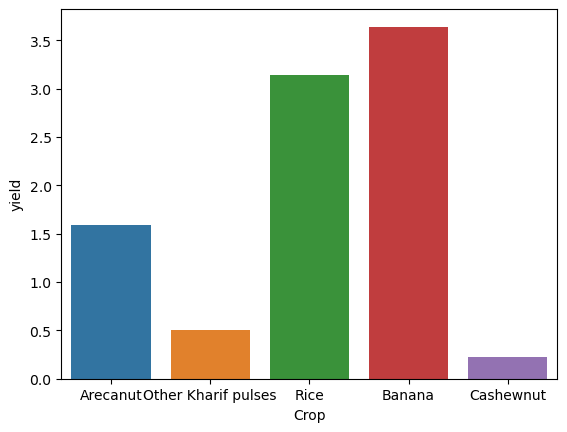

In [19]:
sns.barplot(first_data.head(5)['Crop'],first_data['yield'])

/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop', ylabel='Production'>

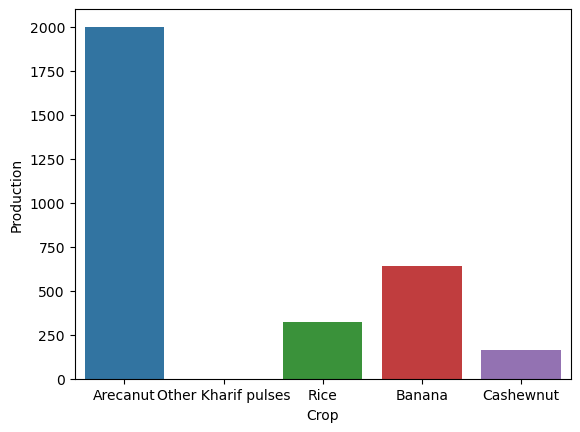

In [20]:
sns.barplot(first_data.head(5)['Crop'],first_data['Production'])

# modeling it

In [22]:
first_data.describe()

,Crop_Year,Area,Production,yield
count,242361.000000,2.423610e+05,2.423610e+05,242361.000000
mean,2005.625773,1.216741e+04,5.825034e+05,41.649059
std,4.958285,5.085744e+04,1.706581e+07,817.572839
min,1997.000000,1.000000e-01,0.000000e+00,0.000000
25%,2002.000000,8.700000e+01,8.800000e+01,0.513514
50%,2006.000000,6.030000e+02,7.290000e+02,1.000000
75%,2010.000000,4.545000e+03,7.023000e+03,2.355450
max,2015.000000,8.580100e+06,1.250800e+09,88000.000000


In [23]:
data = first_data.drop(['State_Name'], axis = 1)

In [24]:
data.corr()

,Crop_Year,Area,Production,yield
Crop_Year,1.000000,-0.025305,0.006989,0.013499
Area,-0.025305,1.000000,0.040587,0.001822
Production,0.006989,0.040587,1.000000,0.330961
yield,0.013499,0.001822,0.330961,1.000000


<AxesSubplot:>

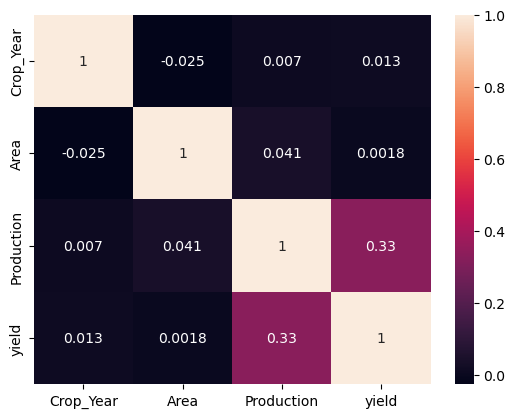

In [25]:
sns.heatmap(data.corr(), annot =True)

In [26]:
dummy = pd.get_dummies(data)
dummy

,Crop_Year,Area,Production,yield,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2014,324.0,16250.0,50.154321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#splitting
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [28]:
print(x_train)
print(y_train)
        

        Crop_Year    Area  District_Name_24 PARAGANAS NORTH  \
201072       2013    16.0                                 0   
191897       1998  5400.0                                 0   
43814        2000  2968.0                                 0   
32815        2013   211.0                                 0   
62249        2006  1700.0                                 0   
...           ...     ...                               ...   
236131       2000   207.0                                 0   
127145       2007    39.0                                 0   
20536        2005    43.0                                 0   
18709        2011  2489.0                                 0   
35767        1999    67.0                                 0   

        District_Name_24 PARAGANAS SOUTH  District_Name_ADILABAD  \
201072                                 0                       0   
191897                                 0                       0   
43814                                  

In [29]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
y_pred
regressor.score(x_test,y_test)


-8344.019009632711

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-8344.019009632711

Text(0.5, 1.0, 'linear Regression')

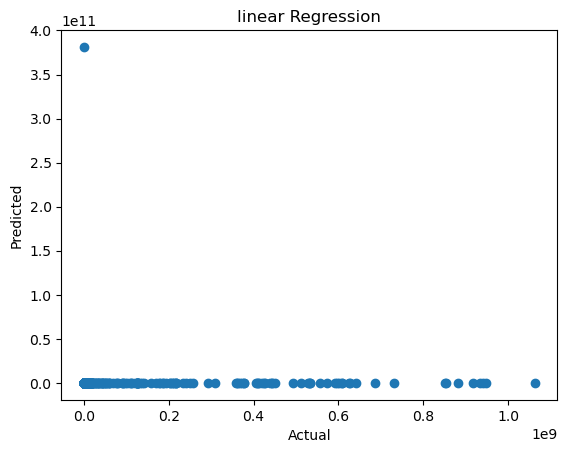

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('linear Regression')

In [32]:
#random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)
yr_pred = regressor.predict(x_test)
yr_pred
regressor.score(x_test,y_test)

0.9912066730865902

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, yr_pred)

0.9912066730865902

Text(0.5, 1.0, 'random forest Regression')

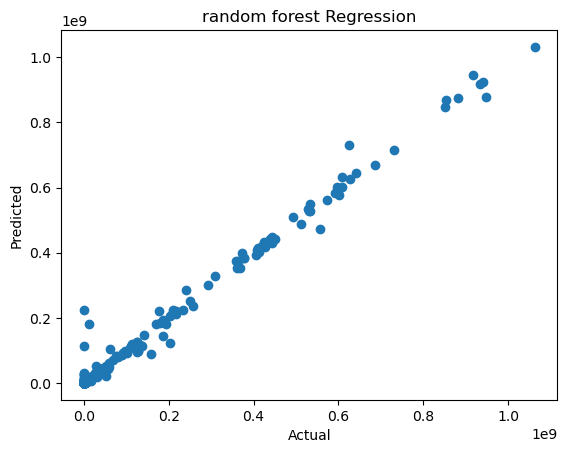

In [35]:
plt.scatter(y_test,yr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('random forest Regression')

In [36]:
#recommenadtion

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
     

In [38]:
dataset2=pd.read_csv("/Users/aditisinha/Downloads/crop_recommendation.csv")
dataset2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [39]:
dataset2.shape

(1697, 8)

In [40]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [41]:
dataset2.isnull().sum().sum()

0

In [42]:
l=dataset2['label'].unique()
l

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [43]:
p=[]
p.append(dataset2['label'].value_counts())
p

[rice          139
 Soyabeans     130
 banana        130
 beans         125
 cowpeas       122
 orange        122
 maize         119
 coffee        110
 peas          100
 groundnuts    100
 mango         100
 grapes        100
 watermelon    100
 apple         100
 cotton        100
 Name: label, dtype: int64]

In [44]:
dataset2.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'Soyabeans'),
  Text(3, 0, 'beans'),
  Text(4, 0, 'peas'),
  Text(5, 0, 'groundnuts'),
  Text(6, 0, 'cowpeas'),
  Text(7, 0, 'banana'),
  Text(8, 0, 'mango'),
  Text(9, 0, 'grapes'),
  Text(10, 0, 'watermelon'),
  Text(11, 0, 'apple'),
  Text(12, 0, 'orange'),
  Text(13, 0, 'cotton'),
  Text(14, 0, 'coffee')])

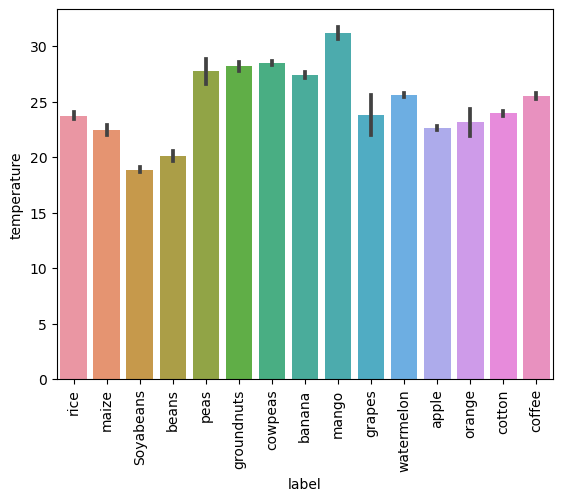

In [45]:
sns.barplot(dataset2["label"], dataset2["temperature"])
plt.xticks(rotation = 90)


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'Soyabeans'),
  Text(3, 0, 'beans'),
  Text(4, 0, 'peas'),
  Text(5, 0, 'groundnuts'),
  Text(6, 0, 'cowpeas'),
  Text(7, 0, 'banana'),
  Text(8, 0, 'mango'),
  Text(9, 0, 'grapes'),
  Text(10, 0, 'watermelon'),
  Text(11, 0, 'apple'),
  Text(12, 0, 'orange'),
  Text(13, 0, 'cotton'),
  Text(14, 0, 'coffee')])

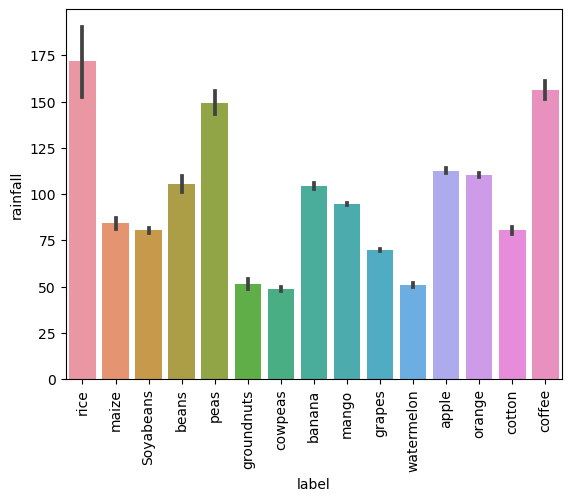

In [46]:
sns.barplot(dataset2["label"], dataset2["rainfall"])
plt.xticks(rotation = 90)


/Users/aditisinha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'Soyabeans'),
  Text(3, 0, 'beans'),
  Text(4, 0, 'peas'),
  Text(5, 0, 'groundnuts'),
  Text(6, 0, 'cowpeas'),
  Text(7, 0, 'banana'),
  Text(8, 0, 'mango'),
  Text(9, 0, 'grapes'),
  Text(10, 0, 'watermelon'),
  Text(11, 0, 'apple'),
  Text(12, 0, 'orange'),
  Text(13, 0, 'cotton'),
  Text(14, 0, 'coffee')])

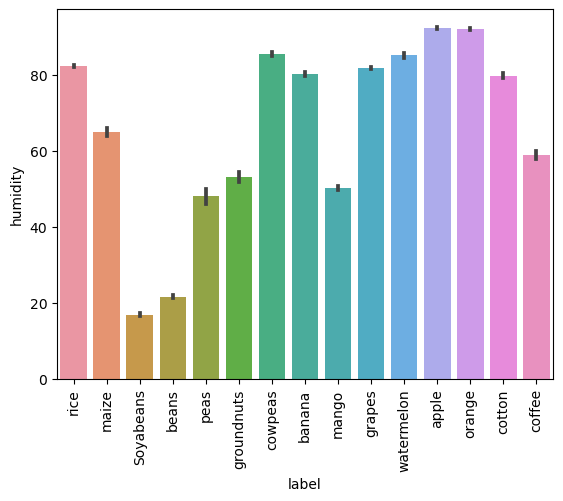

In [47]:
sns.barplot(dataset2["label"], dataset2["humidity"])
plt.xticks(rotation = 90)


In [48]:
dataset2.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.245443,-0.199120,0.003268,0.242780,0.119566,0.126947
P,-0.245443,1.000000,0.822431,-0.161702,0.027050,-0.255942,-0.020124
K,-0.199120,0.822431,1.000000,-0.165350,0.205490,-0.148136,-0.066860
temperature,0.003268,-0.161702,-0.165350,1.000000,0.211219,-0.106763,-0.056895
humidity,0.242780,0.027050,0.205490,0.211219,1.000000,0.012881,-0.008299
ph,0.119566,-0.255942,-0.148136,-0.106763,0.012881,1.000000,-0.104514
rainfall,0.126947,-0.020124,-0.066860,-0.056895,-0.008299,-0.104514,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

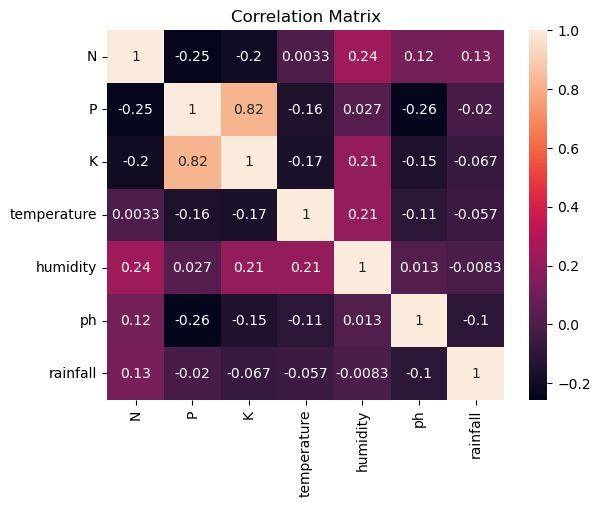

In [49]:
sns.heatmap(dataset2.corr(), annot =True)
plt.title('Correlation Matrix')

In [50]:
from sklearn.utils import shuffle
df  = shuffle(dataset2,random_state=5)

In [58]:
x = df.iloc[:, :-1]
y= df.iloc[:, -1]

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [60]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1272, 7)
x_test : (425, 7)
y_train : (1272,)
y_test : (425,)


In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 6)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=6)

In [62]:
y_pred = classifier.predict(x_test)
y_pred

array(['mango', 'watermelon', 'rice', 'cowpeas', 'cowpeas', 'cowpeas',
       'groundnuts', 'Soyabeans', 'grapes', 'cowpeas', 'maize', 'coffee',
       'rice', 'cowpeas', 'maize', 'coffee', 'mango', 'apple', 'rice',
       'mango', 'watermelon', 'grapes', 'maize', 'watermelon', 'banana',
       'orange', 'apple', 'cotton', 'banana', 'Soyabeans', 'cotton',
       'beans', 'grapes', 'beans', 'mango', 'orange', 'beans', 'banana',
       'orange', 'banana', 'mango', 'banana', 'cotton', 'rice', 'coffee',
       'apple', 'cowpeas', 'orange', 'mango', 'coffee', 'apple',
       'cowpeas', 'watermelon', 'apple', 'rice', 'mango', 'grapes',
       'grapes', 'orange', 'apple', 'Soyabeans', 'watermelon', 'maize',
       'cowpeas', 'maize', 'apple', 'rice', 'watermelon', 'watermelon',
       'watermelon', 'peas', 'grapes', 'grapes', 'apple', 'Soyabeans',
       'cotton', 'watermelon', 'cotton', 'apple', 'Soyabeans', 'orange',
       'apple', 'banana', 'orange', 'watermelon', 'watermelon', 'coffee',


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 33]]


1.0

In [65]:
import pandas as pd
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))